In [1]:
#dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
import api_keys
import random
from citipy import citipy

#output csv
output_data_file = "output_data/cities.csv"

#lats and longs
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#lists
lat_lngs = []
cities = []

#randomize
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#find city
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#verify city count
len(cities)

612

In [3]:
rand_coordinates = [( np.random.uniform(-90,90 ), np.random.uniform(-180,180) ) for k in range(1400)]

In [4]:
cities = []
for coordinate_pair in rand_coordinates:
    lat, long = coordinate_pair
    cities.append(citipy.nearest_city(lat, long))

In [5]:
cities_list=[]
for city in cities:
    country_code = city.country_code
    name = city.city_name
    cities_list.append(name)

In [6]:
actual_cities_list=[]
for city in cities_list:
    if city not in actual_cities_list:
        actual_cities_list.append(city)

In [7]:
#set API
api_key = api_keys.api_key

#set URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

query_url = f"{url}&q="

In [8]:
#data lists
city_name=[]
lat = []
maxtemp = []
hum = []
cloud = []
windsp = []
country = []
date = []
lng = []
count = 1

for city in actual_cities_list: 
    print(f'City number {count}: {city}')
    print(query_url+city)
    count+=1

City number 1: kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159d027408fb96ed7b6c76c07a953703&q=kavaratti
City number 2: pimentel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159d027408fb96ed7b6c76c07a953703&q=pimentel
City number 3: tumannyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159d027408fb96ed7b6c76c07a953703&q=tumannyy
City number 4: beitbridge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159d027408fb96ed7b6c76c07a953703&q=beitbridge
City number 5: kasongo-lunda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159d027408fb96ed7b6c76c07a953703&q=kasongo-lunda
City number 6: kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159d027408fb96ed7b6c76c07a953703&q=kapaa
City number 7: yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159d027408fb96ed7b6c76c07a953703&q=yellowknife
City number 8: jamestown
http://

In [9]:
#city loop
for city in actual_cities_list:
    response = requests.get(query_url+city).json()
    try:
        lat.append(response['coord']['lat'])
    except:
        continue
    city_name.append(response['name'])
    maxtemp.append(response['main']['temp_max'])
    hum.append(response['main']['humidity'])
    cloud.append(response['clouds']['all'])
    windsp.append(response['wind']['speed'])
    country.append(response['sys']['country'])
    date.append(response['dt'])
    lng.append(response['coord']['lon'])
    

In [10]:
print(len(city_name), len(maxtemp), len(hum), len(cloud), len(windsp), len(country), len(date), len(lat), len(lng)) 

539 539 539 539 539 539 539 539 539


In [11]:
#df and variables

cities_df = pd.DataFrame({'City': city_name,
                          'Cloudiness': cloud,
                          'Country': country,
                          'Date': date,
                          'Humidity': hum,
                          'Lat': lat,
                          'Lng': long,
                          'Max Temp': maxtemp,
                          'Wind Speed': windsp
                         })
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kavaratti,100,IN,1571348935,74,10.57,120.491566,82.34,8.01
1,Pimentel,85,BR,1571348936,60,-3.70,120.491566,84.23,2.01
2,Beitbridge,0,ZA,1571348936,33,-22.21,120.491566,65.61,9.19
3,Kasongo-Lunda,100,CD,1571348937,97,-6.48,120.491566,67.94,1.90
4,Kapaa,75,US,1571348937,66,22.08,120.491566,84.20,10.29


In [12]:
citiesdfcsv = cities_df.to_csv("WeatherPyCities.csv")

In [13]:
xaxis = cities_df["Lat"]

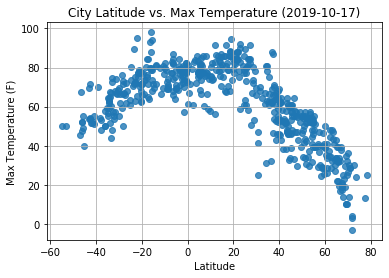

In [14]:
tempyaxis = cities_df["Max Temp"]
plt.scatter(xaxis, tempyaxis, alpha=0.8)
plt.title(f"City Latitude vs. Max Temperature ({datetime.now().date()})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
tempvslatplot = plt.savefig("images/TemperaturevsLat.png")
plt.show()

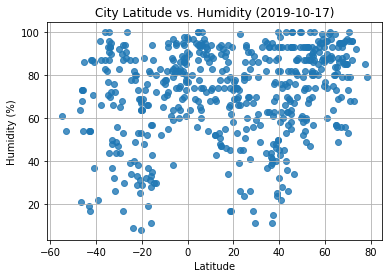

In [15]:
humaxis = cities_df["Humidity"]
plt.scatter(xaxis, humaxis, alpha=0.8)
plt.title(f"City Latitude vs. Humidity ({datetime.now().date()})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
tempvslatplot = plt.savefig("images/HumidityvsLat.png")
plt.show()

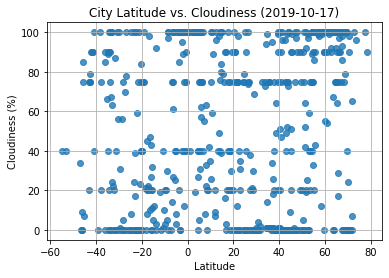

In [16]:
cloudaxis = cities_df["Cloudiness"]
plt.scatter(xaxis, cloudaxis, alpha=0.8)
plt.title(f"City Latitude vs. Cloudiness ({datetime.now().date()})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
tempvslatplot = plt.savefig("images/CloudinessvsLat.png")
plt.show()

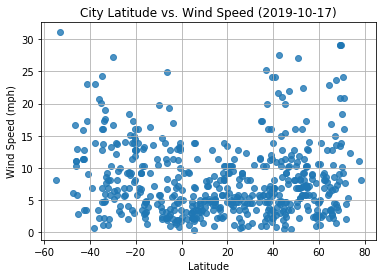

In [17]:
windaxis = cities_df["Wind Speed"]
plt.scatter(xaxis, windaxis, alpha=0.8)
plt.title(f"City Latitude vs. Wind Speed ({datetime.now().date()})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
tempvslatplot = plt.savefig("images/WindSpeedvsLat.png")
plt.show()